# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [19]:
# Importar as bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [15]:
# Ler o arquivo csv

df = pd.read_csv('C:/Users/adilt/Ebac/Notebooks/Cientista de dados/Mod07 - Tarefa 01/demo01_dummy.csv')

In [23]:
# Visualizar estrutura do dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              16650 non-null  int64  
 1   qtd_filhos                              16650 non-null  int64  
 2   idade                                   16650 non-null  float64
 3   tempo_emprego                           16650 non-null  float64
 4   possui_celular                          16650 non-null  int64  
 5   possui_fone_comercial                   16650 non-null  int64  
 6   possui_fone                             16650 non-null  int64  
 7   possui_email                            16650 non-null  int64  
 8   qt_pessoas_residencia                   16650 non-null  float64
 9   mau                                     16650 non-null  int64  
 10  sexo_M                                  16650 non-null  in

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [7]:
# 1) Definir o objeto com árvore de decisão

X = df.drop('idade', axis=1)
y = df['mau']

In [16]:
# 2) Treinando o modelo

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o objeto do classificador de árvore de decisão
clf = DecisionTreeClassifier(random_state=100)

# Treinar o classificador usando os dados de treinamento
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

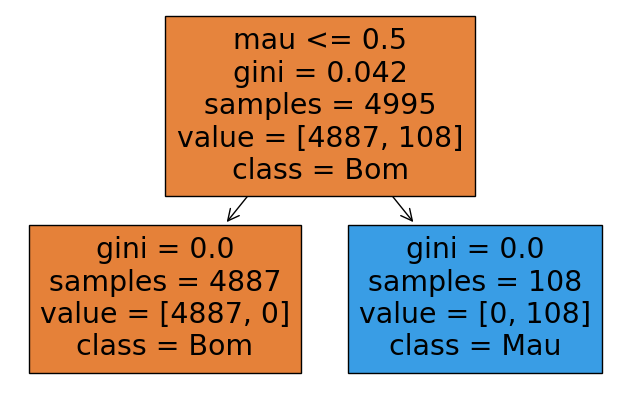

In [39]:
# 3) Visualizar a árvore

plt.figure(figsize=(8, 5))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=['Bom', 'Mau'])
plt.show()

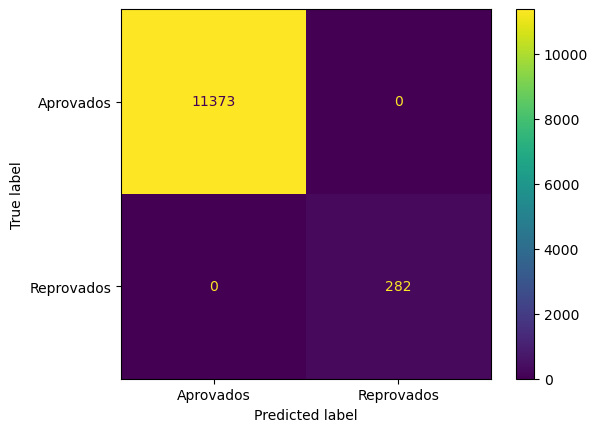

In [29]:
# 4) # Fazer previsões no conjunto de treinamento

y_train_pred = clf.predict(X_train)

# Criar a matriz de confusão

cm = confusion_matrix(y_train, y_train_pred)
cm_fig = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
cm_fig.plot()

In [33]:
# 5) Calcular a acurácia de treinamento

acuracia_train = accuracy_score(y_train, y_train_pred)
print(f'Precisão: {acuracia_train:.2f}')

Precisão: 1.00


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [27]:
# 1) Classificar os dados de teste

clf.fit(X_test, y_test)

DecisionTreeClassifier(random_state=100)

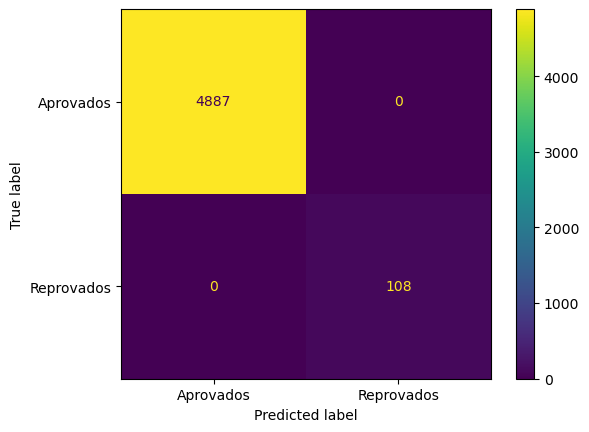

In [28]:
# 2) # Fazer previsões no conjunto de teste

y_pred = clf.predict(X_test)

# Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
cm_fig = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
cm_fig.plot()

In [34]:
# 3) Calcular a acurácia de teste

acuracia_test = accuracy_score(y_test, y_pred)
print(f'Precisão do treinamento: {acuracia_train:.2f}')
print(f'Precisão do teste      : {acuracia_test:.2f}')

Precisão do treinamento: 1.00
Precisão do teste      : 1.00


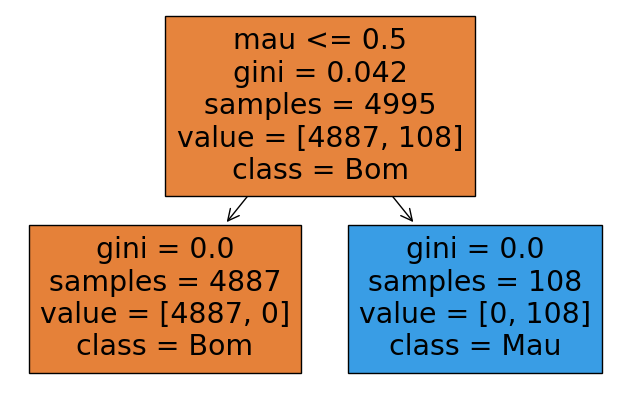

In [38]:
# 4) Criar o objeto do classificador de árvore de decisão com parâmetros específicos

clf = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)

# Treinar o classificador usando os dados de treinamento
clf.fit(X_test, y_test)

#Visualizar a árvore

plt.figure(figsize=(8, 5))
plot_tree(clf, filled=True, feature_names=X_test.columns, class_names=['Bom', 'Mau'])
plt.show()

In [ ]:
# 5) 100%, pois como demonstrrado na resposta do item 2, não houve erro no teste.